In [77]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
validation_file = "./valid.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [78]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of a traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


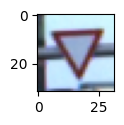

In [79]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(x_train))
image = x_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)

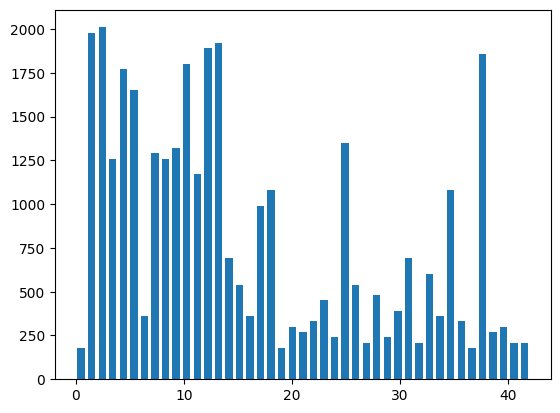

In [80]:
# plot calculate histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

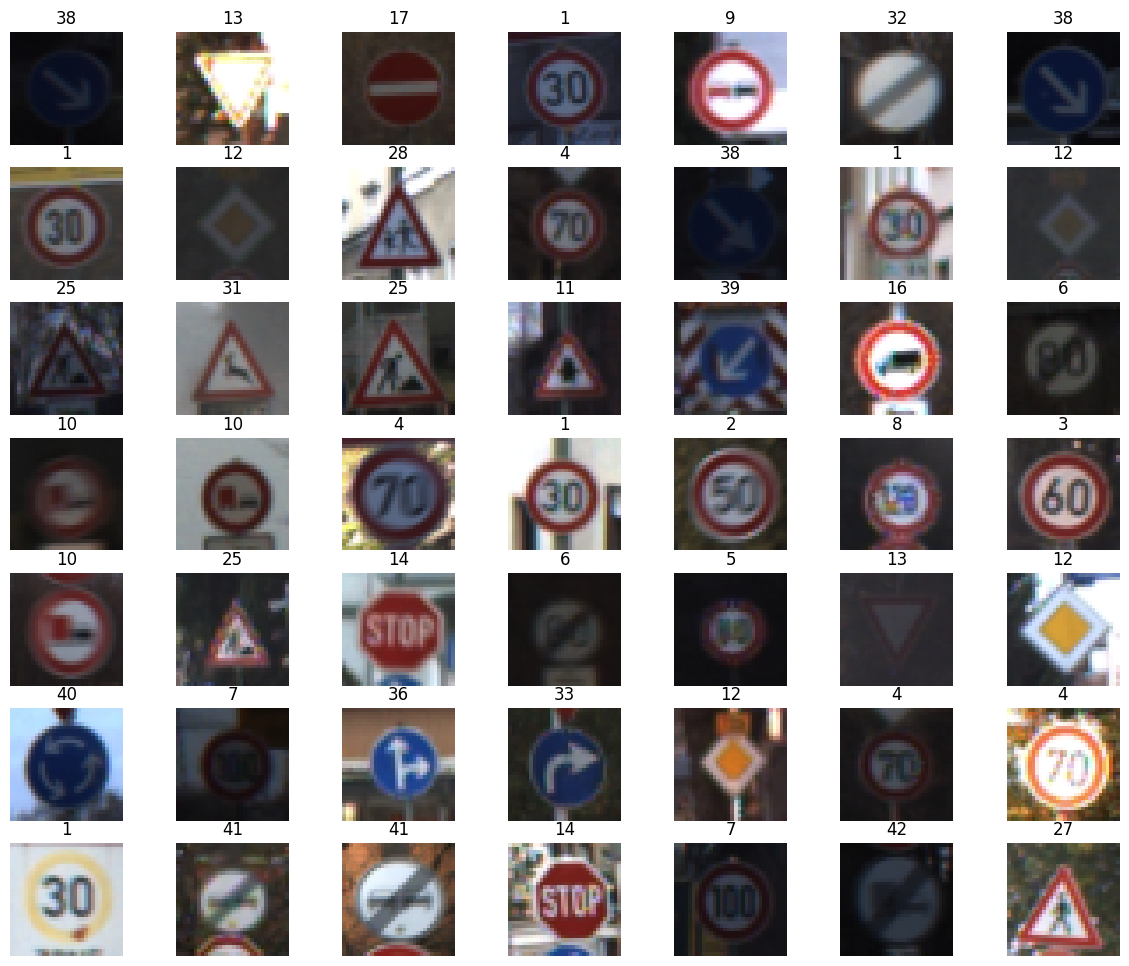

In [81]:
# show image of 49 random data points
figs, axs = plt.subplots(7,7, figsize=(15, 12))
figs.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(49):
    index = random.randint(0, len(x_train))
    image = x_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

In [82]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import tensorflow as tf

# convert to grayscale
def convert_to_gray(images):
    return np.sum(images/3, axis=3, keepdims=True)

# normalize
def normalize(images):
    return (images - 128)/128

# preprocess
def preprocess(images):
    gray_images = convert_to_gray(images)
    return normalize(gray_images)

x_train = preprocess(x_train)
x_valid = preprocess(x_valid)
x_test = preprocess(x_test)

print("Preprocessing done")

#train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=len(x_train)).batch(BATCH_SIZE)
#valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(BATCH_SIZE)
#test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)


Preprocessing done


In [83]:
### Define your architecture here.

import tensorflow.compat.v1 as tf

tf.compat.v1.disable_v2_behavior()

def LeNet(x):
    mu = 0
    sigma = 0.1
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool2d(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool2d(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.compat.v1.layers.flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84. 
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b

    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w) + fc3_b

    return logits

In [84]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.set_visible_devices(physical_devices[0], 'CPU')
    visible_devices = tf.config.get_visible_devices()
else:
    print("GPU not found")

device = tf.device("GPU" if physical_devices else "CPU")

GPU not found


In [85]:
# define a callback class that stops training once validation accuracy reaches 98%
class EarlyStop():
    def __init__(self, threshold):
        self.threshold = threshold
        self.best_accuracy = 0
        self.best_epoch = 0
        self.best_loss = 0
        self.best_loss_epoch = 0
        
    def __call__(self, sess, epoch, loss, accuracy):
        if accuracy > self.best_accuracy:
            self.best_accuracy = accuracy
            self.best_epoch = epoch
        if loss < self.best_loss:
            self.best_loss = loss
            self.best_loss_epoch = epoch
        if accuracy > self.threshold:
            print("Early stopping at epoch %d" % epoch)
            print("Best accuracy: %.3f at epoch %d" % (self.best_accuracy, self.best_epoch))
            print("Best loss: %.3f at epoch %d" % (self.best_loss, self.best_loss_epoch))
            return True
        return False

In [86]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# shuffle training data
from sklearn.utils import shuffle

tf.reset_default_graph() 

# define hyperparameters
EPOCHS = 20
BATCH_SIZE = 128

# define placeholders
x = tf.compat.v1.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.compat.v1.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.compat.v1.placeholder(tf.float32)

# define training pipeline
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)

# define loss function
loss_operation = tf.reduce_mean(cross_entropy)

# define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=rate)

# define training operation
training_operation = optimizer.minimize(loss_operation)

# define evaluation function
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# define accuracy operation
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# define saver
saver = tf.train.Saver()

# define evaluation function
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset+BATCH_SIZE
        batch_x, batch_y = x_data[offset:end], y_data[offset:end]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x:batch_x, y:batch_y})
        total_accuracy += (accuracy*len(batch_x))
        total_loss += (loss*len(batch_x))
    return total_accuracy/num_examples, total_loss/num_examples


C:\Users\tammy\AppData\Local\Temp\ipykernel_13620\2266503316.py:33: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  fc0 = tf.compat.v1.layers.flatten(conv2)


In [87]:
# training and evaluation
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    early_stop = EarlyStop(0.98)
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train) # shuffle training data
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end],y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:0.5})
        validation_acc, validation_loss = evaluate(x_valid, y_valid)
        

        print(
            f"[ Validation | {i + 1:03d}/{EPOCHS:03d} ] acc = {validation_acc:.5f}"
        )
        if early_stop(sess, i+1, validation_loss, validation_acc):
            break
        
        saver.save(sess, 'lenet')
        print("Model saved")

Training...

[ Validation | 001/020 ] acc = 0.69388
Model saved
[ Validation | 002/020 ] acc = 0.82630
Model saved
[ Validation | 003/020 ] acc = 0.84059
Model saved
[ Validation | 004/020 ] acc = 0.87868
Model saved
[ Validation | 005/020 ] acc = 0.87664
Model saved
[ Validation | 006/020 ] acc = 0.86327
Model saved
[ Validation | 007/020 ] acc = 0.88662
Model saved
[ Validation | 008/020 ] acc = 0.89909
Model saved
[ Validation | 009/020 ] acc = 0.89433
Model saved
[ Validation | 010/020 ] acc = 0.88889
Model saved
[ Validation | 011/020 ] acc = 0.88005
Model saved
[ Validation | 012/020 ] acc = 0.89660
Model saved
[ Validation | 013/020 ] acc = 0.88776
Model saved
[ Validation | 014/020 ] acc = 0.88390
Model saved
[ Validation | 015/020 ] acc = 0.90590
Model saved
[ Validation | 016/020 ] acc = 0.89932
Model saved
[ Validation | 017/020 ] acc = 0.90204
Model saved
[ Validation | 018/020 ] acc = 0.90839
Model saved
[ Validation | 019/020 ] acc = 0.90748
Model saved
[ Validation | 020

In [88]:
# testing
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")

    print("Testing...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train) # shuffle training data
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end],y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob:0.5})
        
        test_acc, test_loss = evaluate(x_test, y_test)
        print(
            f"[ Test | {i + 1:03d}/{EPOCHS:03d} ] acc = {test_acc:.5f}"
        )

print(f"acc = {test_acc:.5f}")

INFO:tensorflow:Restoring parameters from ./lenet
Testing...

[ Test | 001/020 ] acc = 0.89184
[ Test | 002/020 ] acc = 0.90523
[ Test | 003/020 ] acc = 0.90253
[ Test | 004/020 ] acc = 0.90721
[ Test | 005/020 ] acc = 0.90784
[ Test | 006/020 ] acc = 0.89264
[ Test | 007/020 ] acc = 0.90499
[ Test | 008/020 ] acc = 0.91077
[ Test | 009/020 ] acc = 0.90602
[ Test | 010/020 ] acc = 0.90618
[ Test | 011/020 ] acc = 0.88583
[ Test | 012/020 ] acc = 0.89636
[ Test | 013/020 ] acc = 0.90776
[ Test | 014/020 ] acc = 0.89857
[ Test | 015/020 ] acc = 0.90855
[ Test | 016/020 ] acc = 0.90491
[ Test | 017/020 ] acc = 0.90823
[ Test | 018/020 ] acc = 0.91140
[ Test | 019/020 ] acc = 0.90641
[ Test | 020/020 ] acc = 0.90293
acc = 0.90293
